# Section 2. Error Analysis Using Plots

This notebook is designed to guide you through plotting error for rootfinding methods.

Please submit your answers to the questions below along with screenshots of the plots you make while working through this.

Let's continue working with the very simple equation $f(x) = x^2 -2$ with solution $p = \sqrt{2}.$

Since we know the exact solution to this equation, we can compare the exact answer to the value of the approximation at each iteration and calculate the absolute error:

$$ \text{Absolute Error = |Approximate Solution - Exact Solution|}.$$

The code cell below defines the function we devloped in class to carry out the bisection method with one small change.

In [1]:
import numpy as np

def my_bisection_method(my_func,a,b,TOL,exact_root):
  
  #check if initial point satisfies the initial criteria
  if my_func(a) == 0:
    print("The root is {}".format(a))
    return a
  
  if my_func(b) == 0:
    print("The root is {}".format(b))
    return b
  
  if my_func(a)*my_func(b) > 0:
    print("Sign of f(a) and sign of f(b) must be opposite")
    return None
  
  curr_iter = 1
  error_vec = []
  
  #Looping Bisection Method
  while (b-a)/2 > TOL:
     print("The current iteration is {}".format(curr_iter))
     print("The current error is = {}".format((b-a)/2))
     p = a + (b-a)/2
     abs_error = np.abs(p-exact_root)
     error_vec.append(abs_error)
     print("The approximation p_k = {}".format(p))
     print("f(p_k) = {}".format(my_func(p)))
     
     if my_func(p)==0:
       print("The root is {}".format(p))
       return p
     
     if my_func(a)*my_func(p)>0:
        a = p
     else:
        b = p
        
     curr_iter = curr_iter + 1
  print("Current error is {}".format((b-a)/2))
  return p, error_vec


**Question 1:** How many inputs does the function have? What are they? How many outputs does the function have? What are they?

 - The function has inputs (my_func,a,b,TOL,exact_root), so five total, all required
   - The function we're trying to find a root for
   - The lower bound
   - The upper bound
   - The tolerance we're looking to get the root within
   - The actual root we're comparing against
 - The function prototype isn't explicitly declared, but, analyzing the return statement 'return p, error_vec' we can determine that we have two outputs
   - The independent value of the root we've found
   - A list of error values (a vector)


Next I will show you how to call a function with two outputs.

In [2]:
import numpy as np

my_func = lambda x: x**2-2
a = 0
b = 2
tol = .001
exact_root = np.sqrt(2)

approx_root, error_vec = my_bisection_method(my_func,a,b,tol,exact_root)

error_vec_length = len(error_vec)

print("The length of the error vector is {}".format(error_vec_length))


The current iteration is 1
The current error is = 1.0
The approximation p_k = 1.0
f(p_k) = -1.0
The current iteration is 2
The current error is = 0.5
The approximation p_k = 1.5
f(p_k) = 0.25
The current iteration is 3
The current error is = 0.25
The approximation p_k = 1.25
f(p_k) = -0.4375
The current iteration is 4
The current error is = 0.125
The approximation p_k = 1.375
f(p_k) = -0.109375
The current iteration is 5
The current error is = 0.0625
The approximation p_k = 1.4375
f(p_k) = 0.06640625
The current iteration is 6
The current error is = 0.03125
The approximation p_k = 1.40625
f(p_k) = -0.0224609375
The current iteration is 7
The current error is = 0.015625
The approximation p_k = 1.421875
f(p_k) = 0.021728515625
The current iteration is 8
The current error is = 0.0078125
The approximation p_k = 1.4140625
f(p_k) = -0.00042724609375
The current iteration is 9
The current error is = 0.00390625
The approximation p_k = 1.41796875
f(p_k) = 0.0106353759765625
The current iteratio

**Question 2:** Is the number of iterations consistent with the theory?

Next we will make plots of the absolute error on the vertical axis and the iteration number on the horizontal axis.

Run the code cell below to redefine the bisection method function so it carries out more iterations than needed. This way our plots will look better.

In [3]:
import numpy as np
#this code block defines the function called my_bisection_method
#INPUTS: function my_func, a, b, TOL, exact root
#OUTPUTS: root or a error message
def my_bisection_method(my_func,a,b,TOL,exact_root,max_iter):
  if my_func(a) == 0:
    print("The root is {}".format(a))
    return a#this end the function
  if my_func(b) == 0:
    print("The root is {}".format(b))
    return b#this end the function
  if my_func(a)*my_func(b) > 0:
    print("Sign of f(a) and sign of f(b) must be opposite")
    return None#this end the function
  curr_iter = 1
  error_vec = []
  for i in range(max_iter):#current interval divided by two bigger than tol
    print("The current iteration is {}".format(curr_iter))
    print("The current error is = {}".format((b-a)/2))
    p = a + (b-a)/2
    #compute |approximate root - exact root|
    abs_error = np.abs(p-exact_root)
    error_vec.append(abs_error)
    print("The approximation p_k = {}".format(p))
    print("f(p_k) = {}".format(my_func(p)))
    if my_func(p)==0:
      print("The root is {}".format(p))
      return p#this end the function
    if my_func(a)*my_func(p)>0:
      a = p
    else:
      b = p
    curr_iter = curr_iter + 1
  print("Current error is {}".format((b-a)/2))
  return p, error_vec

In [4]:
import numpy as np
#define the inputs
my_func = lambda x: x**2-2
a = 0
b = 2
tol = .001
exact_root = np.sqrt(2)
max_iter = 30
#call the function
approx_root, error_vec = my_bisection_method(my_func,a,b,tol,exact_root,max_iter)

The current iteration is 1
The current error is = 1.0
The approximation p_k = 1.0
f(p_k) = -1.0
The current iteration is 2
The current error is = 0.5
The approximation p_k = 1.5
f(p_k) = 0.25
The current iteration is 3
The current error is = 0.25
The approximation p_k = 1.25
f(p_k) = -0.4375
The current iteration is 4
The current error is = 0.125
The approximation p_k = 1.375
f(p_k) = -0.109375
The current iteration is 5
The current error is = 0.0625
The approximation p_k = 1.4375
f(p_k) = 0.06640625
The current iteration is 6
The current error is = 0.03125
The approximation p_k = 1.40625
f(p_k) = -0.0224609375
The current iteration is 7
The current error is = 0.015625
The approximation p_k = 1.421875
f(p_k) = 0.021728515625
The current iteration is 8
The current error is = 0.0078125
The approximation p_k = 1.4140625
f(p_k) = -0.00042724609375
The current iteration is 9
The current error is = 0.00390625
The approximation p_k = 1.41796875
f(p_k) = 0.0106353759765625
The current iteratio

In [5]:
# next we will plot the absolute error on the vertical axis and the iteration number on the horizontal axis
import matplotlib.pyplot as plt
# "formula" for making a scatterplot
# plt.plot(x_vals, y_vals)
# in this case the x_vals should be the set of iterations x_vals = [1,2,3,4,5,6,7,8,9,10]
# there are many ways to make collections of numbers like this in Pyhton
# we will keep using numpy
x_vals = np.arange(1,11)
print(x_vals)
# notice it leaves off the last number

[ 1  2  3  4  5  6  7  8  9 10]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


Text(0, 0.5, 'Absolute Error')

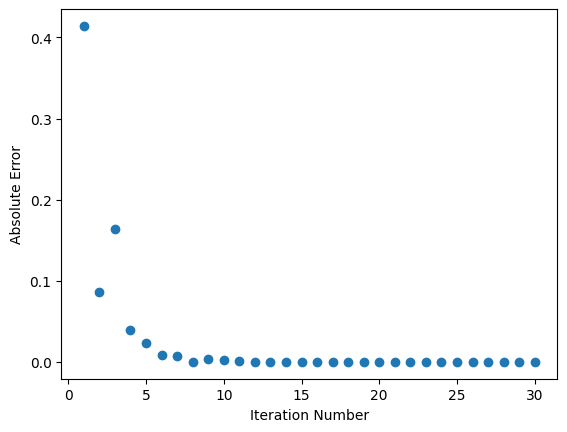

In [6]:
# the best way to set up this vector is below
x_vals = np.arange(1,len(error_vec)+1)#the len(error_vec) function returns the # of things in the error_vec array
print(x_vals)
# now we make the plot
plt.scatter(x_vals, error_vec)
# add some titles so we know what we are looking at
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")

As expected, the absolute error follows an exponentially decreasing trend. Namely, $\frac{b-a}{2^n}$.

Notice that it isn’t a completely smooth curve since we will have some jumps in the accuracy just due to the fact that sometimes the root will be near the midpoint of the interval and sometimes it won’t be.

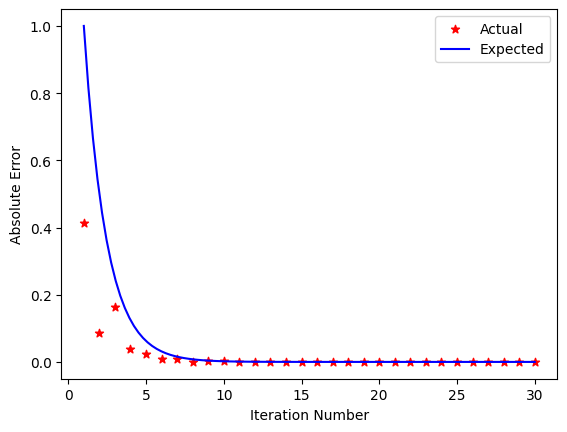

In [7]:
# we can add the theoretical curve to our plot
a = 0
b = 2
error_func = lambda n: (b-a)/(2**n)
# now we make the plot with the error vals we computed vs. this function
plt.scatter(x_vals, error_vec,label = "Actual", marker = '*', color = 'r')
# I added a label so we could make a legend, we can also specify the marker type and color
smooth_x_vals = np.linspace(1,max_iter,100)
plt.plot(smooth_x_vals, error_func(smooth_x_vals), label = "Expected", color = 'b')
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
# this uses the labels I defined in the plot call above
plt.legend()


Without the theory, it would be really hard to determine what the exact behavior is in the exponential plot above. We know that the error will divide by 2 at every step, so if we instead plot

$$\log_2({errorvec})$$

against the iteration number we should see a linear trend.

Text(0, 0.5, 'log_2(Absolute Error)')

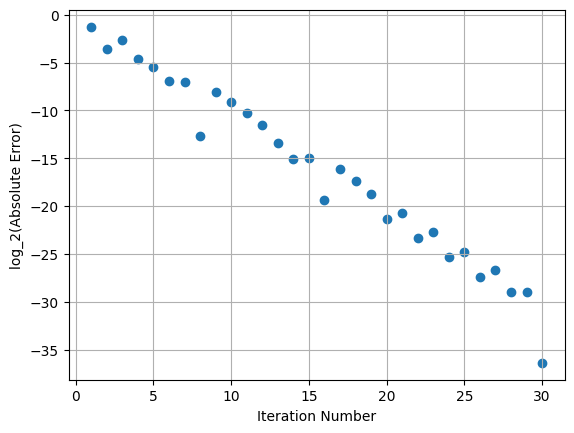

In [8]:
plt.scatter(x_vals, np.log2(error_vec))
# Add grid lines
plt.grid(True)
plt.xlabel("Iteration Number")
plt.ylabel("log_2(Absolute Error)")

**Question 3:** What is the slope of the line in the plot above (estimate it)? Why does that slope make sense?

Another plot we can use to determine how an algorithm is behaving as it progresses is to compare the absolute error at iteration $k$ to the absolute error at iteration $k + 1$.

Run the code below to print the lenght of the ${error\_vec}$.

In [9]:
print(len(error_vec))

30


In [10]:
# let's learn how to pull out values at certain indices of a vector like error_vec
error_at_k = error_vec[0:len(error_vec)-1]#this pulls out the first 29 values
# Note that: 1) we start at 0 not 1, so the indices of the vector go from 0-29
# in python this code will go up to but not include the value in the 29th and last index
print(len(error_at_k))

29


**Question 4:** How would you pull out the first five values?

In [11]:
error_first_5_values = error_vec[0:5]
print(len(error_first_5_values))


5


**Question 5:** Make a vector called ${error\_at\_k\_plus\_1}$ with the last 29 values of ${error\_vec}$.

In [12]:
error_at_k_plus_1 = error_vec[1:len(error_vec)]
print(len(error_at_k_plus_1))

29


**Question 6:** Which values does the line above pull out?

Text(0, 0.5, 'log2(Error at step k+1)')

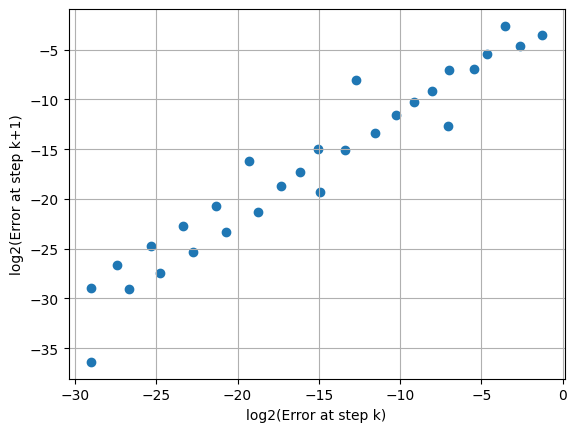

In [13]:
# write code to plot error_at_k_plus_1 vs. error_at_k
plt.scatter(np.log2(error_at_k),np.log2(error_at_k_plus_1))
# Add grid lines
plt.grid(True)
plt.xlabel("log2(Error at step k)")
plt.ylabel("log2(Error at step k+1)")

**Question 7** Interpret the graph above.

The graph is displaying linear behavoir, a straight line, let's break down the details.
 - We can see along the left side that our dependent variable is $log_2(x)$ of the step ahead
 - We can see along the bottom side that our independent variable is $log_2(x)$ of the current step
 - We're taking the error at both
 - Taken all together, we can see that the subsequent step is twice as accurate, half as inaccurate
 - We're demonstrating here the behavoir of the bisection method, we're throwing out half the search space each time, so, we're converging at $O(log_2(n))$